# 1. Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics

#For splitting the dataset into train and test subsets
from sklearn.model_selection import train_test_split

#For runtime
import time
from timeit import repeat      
from functools import partial

# 2. Importing and viewing the data

In [3]:
#Importing the data into Jupyter notebook
audi = pd.read_csv('audi.csv')

#View the first five rows of the dataset
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
#View general information about the dataframe such as number of observations, data types etc.
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
#View statistical data about the dataset
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
#Check for different values of categirical arrtibutes (object Data type)
print (audi['model'].unique())
print (audi['transmission'].unique())
print (audi['fuelType'].unique())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
['Manual' 'Automatic' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid']


In [7]:
#Replacing categorical variables with numbers (except model)
audi.replace({'fuelType':{'Petrol':0, 'Diesel':1, 'Hybrid':2}}, inplace=True)
audi.replace({'transmission':{'Manual':0, 'Automatic':1, 'Semi-Auto':2}}, inplace=True)
#Updated view of the dataframe
audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,0,15735,0,150,55.4,1.4
1,A6,2016,16500,1,36203,1,20,64.2,2.0
2,A1,2016,11000,0,29946,0,30,55.4,1.4
3,A4,2017,16800,1,25952,1,145,67.3,2.0
4,A3,2019,17300,0,1998,0,145,49.6,1.0


# 3. Visualising the data

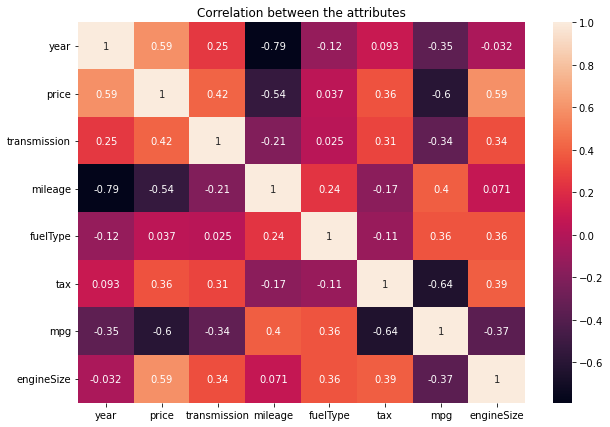

In [8]:
#Checking for correlations between different attributes
plt.figure(figsize=(10,7))
sns.heatmap(audi.corr(), annot=True)
plt.title('Correlation between the attributes')
plt.show()

<AxesSubplot:title={'center':'Price vs year Bar Plot'}, xlabel='year', ylabel='price'>

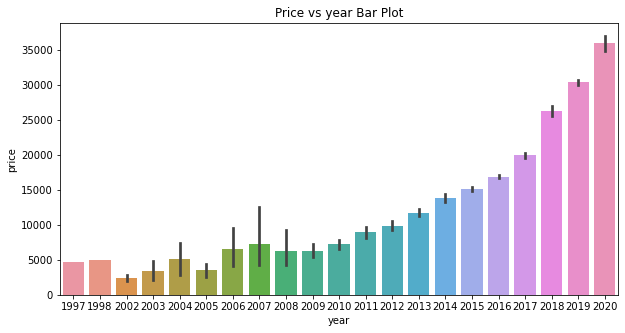

In [9]:
#In the following cells we will visualise variables which are highly correlated withprice (value greater than +-0.5)

#Visualising the relationship between the year of production and average selling price
plt.figure(figsize=(10,5),facecolor='w')
plt.title('Price vs year Bar Plot')
sns.barplot(x = "year", y = "price", data=audi)

<AxesSubplot:title={'center':'Correlation between mileage and price'}, xlabel='mileage', ylabel='price'>

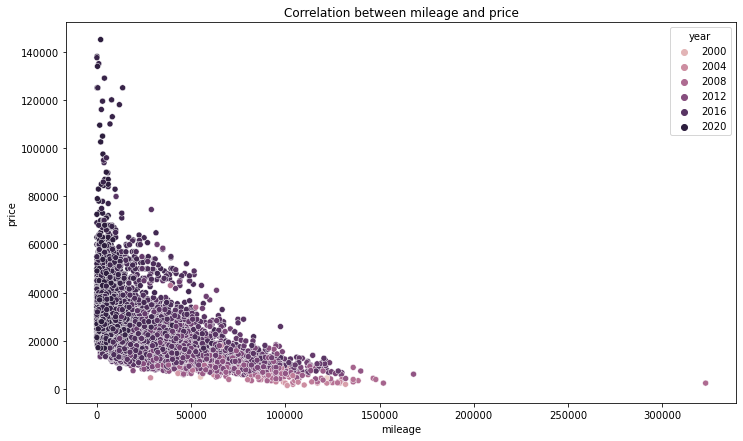

In [10]:
#Visualising the relationship between mileage and selling price
plt.figure(figsize=(12,7),facecolor='w')
plt.title('Correlation between mileage and price')
sns.scatterplot(x="mileage", y="price", hue = "year", data=audi)

<AxesSubplot:title={'center':'Correlation between mpg and price'}, xlabel='mpg', ylabel='price'>

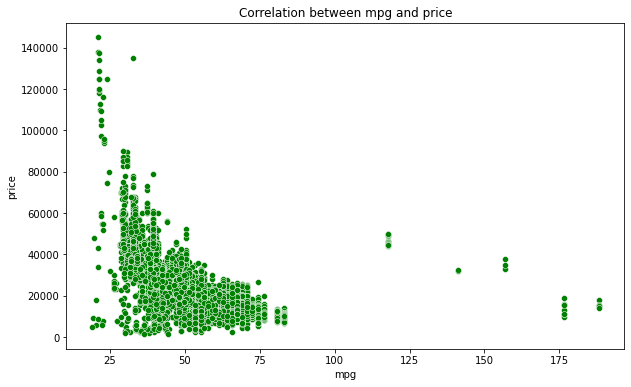

In [11]:
#Visualising the relationship between mpg and selling price
plt.figure(figsize=(10,6),facecolor='w')
plt.title('Correlation between mpg and price')
sns.scatterplot(x="mpg", y="price", color="green", data=audi)

<AxesSubplot:title={'center':'Correlation between engine size and price'}, xlabel='engineSize', ylabel='price'>

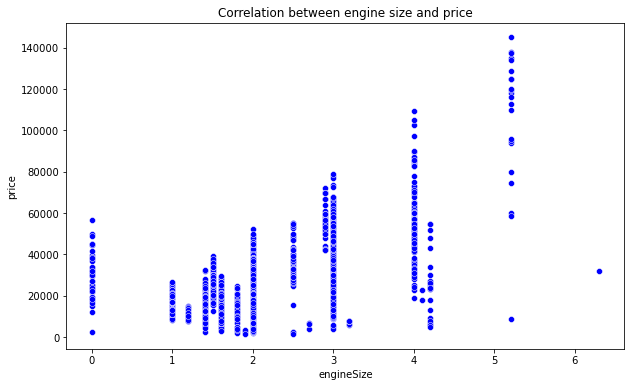

In [12]:
#Visualising the relationship between mpg and selling price
plt.figure(figsize=(10,6),facecolor='w')
plt.title('Correlation between engine size and price')
sns.scatterplot(x="engineSize", y="price", color="blue", data=audi)

# 4. Cleaning the data

In [13]:
#Identifying the outlier with the highest mileage
maxValue = audi["mileage"].max()
print(maxValue)

323000


In [14]:
#Identifying the outlier index
milCol = audi["mileage"]
milCol.idxmax()

9822

In [15]:
#Viewing the information about the outlier car
print(audi.loc[[9822]])

     model  year  price  transmission  mileage  fuelType  tax   mpg  \
9822    A6  2008   2490             0   323000         1  200  44.1   

      engineSize  
9822         2.0  


In [16]:
#Removing the outlier to reduce distortion of the regression
#Creating a new dataset without the outlier
audi_fair = audi.drop([9822])
audi_fair

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,0,15735,0,150,55.4,1.4
1,A6,2016,16500,1,36203,1,20,64.2,2.0
2,A1,2016,11000,0,29946,0,30,55.4,1.4
3,A4,2017,16800,1,25952,1,145,67.3,2.0
4,A3,2019,17300,0,1998,0,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,0,4018,0,145,49.6,1.0
10664,A3,2020,16999,0,1978,0,150,49.6,1.0
10665,A3,2020,17199,0,609,0,150,49.6,1.0
10666,Q3,2017,19499,1,8646,0,150,47.9,1.4


In [17]:
#Identifying the outlier with the highest engine size
maxValue1 = audi["engineSize"].max()
print(maxValue1)

6.3


In [18]:
#Identifying the outlier index
milCol = audi["engineSize"]
milCol.idxmax()

10455

In [19]:
#Viewing the information about the outlier car
print(audi.loc[[10455]])

      model  year  price  transmission  mileage  fuelType  tax   mpg  \
10455    A8  2015  32000             1    30306         0  570  25.0   

       engineSize  
10455         6.3  


In [20]:
#Removing the second outlier
audi_fair = audi.drop([9822, 10455])
audi_fair

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,0,15735,0,150,55.4,1.4
1,A6,2016,16500,1,36203,1,20,64.2,2.0
2,A1,2016,11000,0,29946,0,30,55.4,1.4
3,A4,2017,16800,1,25952,1,145,67.3,2.0
4,A3,2019,17300,0,1998,0,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,0,4018,0,145,49.6,1.0
10664,A3,2020,16999,0,1978,0,150,49.6,1.0
10665,A3,2020,17199,0,609,0,150,49.6,1.0
10666,Q3,2017,19499,1,8646,0,150,47.9,1.4


In [21]:
#Double checking if the otliers have been removed
maxValue_new = audi_fair["mileage"].max()
print(maxValue_new)

maxValue1_new = audi_fair["engineSize"].max()
print(maxValue1_new)

168017
5.2


<AxesSubplot:title={'center':'Correlation between mileage and price'}, xlabel='mileage', ylabel='price'>

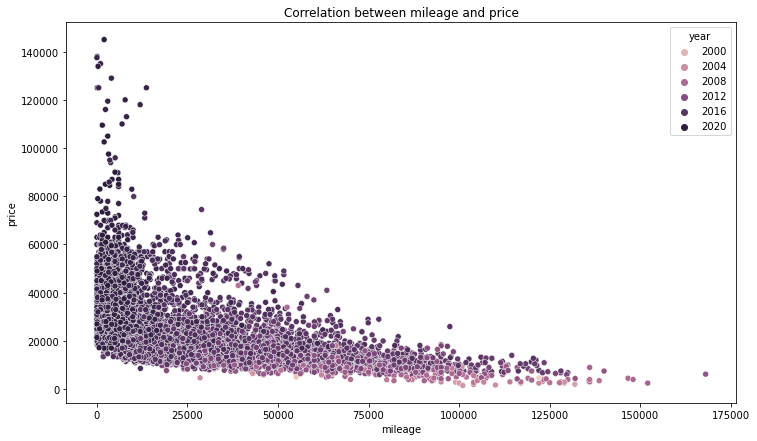

In [22]:
#Visualising the relationship between mileage and selling price without the outlier
plt.figure(figsize=(12,7),facecolor='w')
plt.title('Correlation between mileage and price')
sns.scatterplot(x="mileage", y="price", hue = "year", data=audi_fair)

<AxesSubplot:title={'center':'Correlation between engine size and price'}, xlabel='engineSize', ylabel='price'>

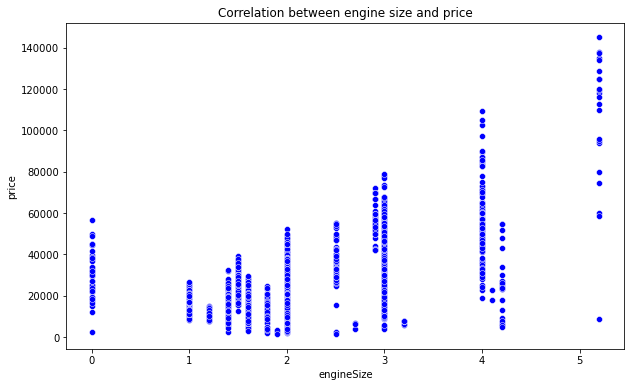

In [23]:
#Visualising the relationship between mpg and selling price without the outlier
plt.figure(figsize=(10,6),facecolor='w')
plt.title('Correlation between engine size and price')
sns.scatterplot(x="engineSize", y="price", color="blue", data=audi_fair)

# 5. Building a Linear Regression

In [25]:
#Initialising the predictors and the response variables
#X represent what the model inputs as the explanatory variales
#y is what we are trying to predict, what the predictors are regressed towards
X = audi_fair[['mileage' , 'mpg' , 'engineSize', ]]
y = audi_fair['price']

#Normalising X and y
X = X.values
x_mean = np.mean(X , axis = 0 )
x_std = np.std(X , axis = 0)
X = (X-x_mean)/x_std

y_real = y.values
y_mean = np.mean(y_real , axis = 0 )
y_std = np.mean(y_real , axis = 0)
y_norm =(y_real-y_mean)/y_std

#Creating another column for the intercept, initialising it with 1's
intercept = np.ones((X.shape[0] , 1))
#Stack arrays in sequence horizontally (column wise) - Adding the intercept collumn to the X subset
X = np.hstack((intercept , X))

#Splitting the data into test and train subsets
#test_size=0.25 means 75% - training data, 25% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size=0.25, random_state=21)

#Checking the sizes of train and test datasets
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_test shape: ", y_test.shape)
print("y_train shape:", y_train.shape)


X_test shape: (2667, 4)
X_train shape: (7999, 4)
y_test shape:  (2667,)
y_train shape: (7999,)


In [26]:
#View X_train
X_train

array([[ 1.        , -0.82795455, -0.51538115,  0.11588972],
       [ 1.        , -0.8609188 , -0.76252694, -0.71536767],
       [ 1.        , -0.2698771 ,  0.27239607, -0.71536767],
       ...,
       [ 1.        , -0.03651251,  1.03700336,  0.11588972],
       [ 1.        , -0.89358298, -0.34546842, -0.54911619],
       [ 1.        , -1.0320414 , -0.09059932, -0.54911619]])

In [27]:
#View y_train
y_train

array([ 0.70104088,  0.09050041, -0.03964341, ..., -0.4454039 ,
        0.02586522, -0.0703888 ])

In [123]:
def reg_pred(x , W):
    '''
    Explanation of the function
    ''' 
    y = 0
    Len = x.shape[0]
    for i in range(Len):
        y+=(x[i]*W[i])
    return y

In [124]:
#Function to calcutate the R**2
def R_Squared(input_feature, output, Weights):
    '''
    Explanation of the function
    '''
    Error = 0.0
    Len = input_feature.shape[0]
    for i in range(Len):
        pred = reg_pred(input_feature[i] , Weights)
        
        currError = (output[i] - pred)**2
        Error+=currError
    
    return Error/Len
        

In [125]:
def Grad(x , y , W):
    '''
    Explanation of the function
    '''
    row , col = x.shape
    grad = np.zeros((col , ))
    for i in range(col):
        for j in range(row):
            y_pred = reg_pred(x[j] , W)
            grad[i] +=  (y_pred - y[j] ) *x[j][i]  
    return grad/row

In [126]:
def Gradient_Descent(x , y , learningRate , iterations ):
    '''
    Explanation of the function
    '''
    row , col = x.shape
    #To demonstrate the gradient descent algorithm, we initialize the weights with 0
    W = np.zeros((col , ))
    ErrorList = []
    for i in range(iterations):
        error = R_Squared(x , y , W)
        ErrorList.append(error)
        #print(error)  remove # later
        grad = Grad(x , y , W)
        for j in range(col):
            W[j] = W[j] - learningRate*grad[j]
    return W , ErrorList
        

In [127]:
St = time.time()
Weights , Error_list = Gradient_Descent(X_train , y_train , 0.01 , 500)
end = time.time()
print("time taken " , end - St)

time taken  59.98937153816223


In [128]:
def Score(X , Y , W):
    '''
    Explanation of the function
    '''
    Y_pred = []
    for i in range(X.shape[0]):
        Y_pred.append(reg_pred(X[i] , W))
    Y_pred = np.array(Y_pred)
    upper = np.sum((Y - Y_pred)**2)
    down = np.sum((Y- Y.mean())**2)
    return 1 - (upper/down)
    

In [129]:
print(Score(X_train , y_train,Weights))
print(Score(X_test , y_test,Weights))

0.7104723605478886
0.7317186175377932


In [131]:
def pred(milage , mpg , engineSize, Weights):
    '''
    Explanation of the function
    '''
    
    X = [ milage , mpg, engineSize ]
    X = np.array(X)
    X = (X - x_mean) / x_std
    
    intercept = np.ones((1 , ))
    X = np.hstack((intercept , X))
    pred = (reg_pred(X , Weights))
    Y = (pred*y_std + y_mean)
    return Y

In [132]:
pred(10000 , 45 , 3 , Weights)

39029.245064920986

# 6. Big O plots

In [2]:
#Not really sure about this part yet

Text(0.5, 1.12, 'Big(O) for Linear Regression, observations treated as constant')

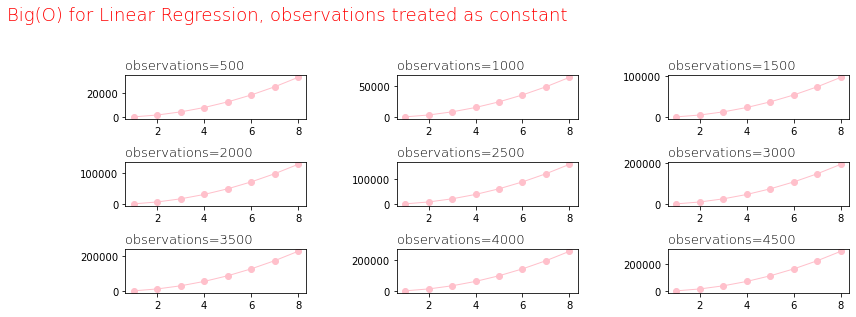

In [70]:
    """
    The complexity of the Linear Regression is O(m²(n + m)),
    where m are the attributes and n are the number of observations.
    
    """
#(number of observations) as a constant


num=0
n_attributes= [n for n in range(1,9)]

for n_observations in range (500,5000,500):
        num+=1
    
        y= [n**2*( n_observations+n) for n in n_attributes]
   
 
        plt.subplot(3,3, num)
        matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=1.8, top=None, wspace=0.5, hspace=1)
       

        plt.plot(n_attributes, y, 'o-', linewidth=1, alpha=1, color="pink")
        title=str(n_observations)
        title1="observations="+title
        plt.title(title1, loc="left", fontsize=13, fontweight=0)

plt.suptitle("Big(O) for Linear Regression, observations treated as constant",fontsize=18, fontweight=0, color="red", y=1.12 )

Text(0.5, 1.12, 'Big(O) for CART Classifier, attributes treated as constant')

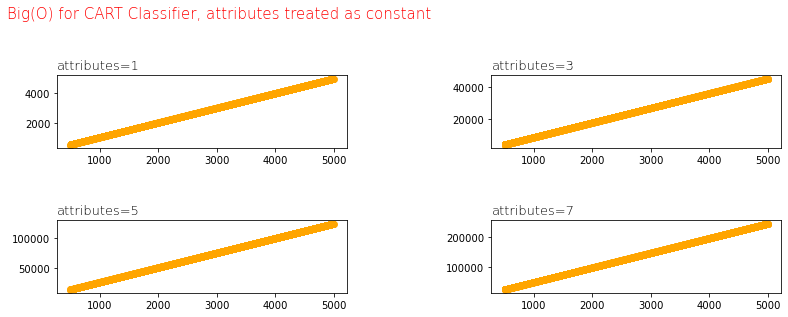

In [71]:
#number of attributes (predictors) as a constant

num=0
for n_attributes in range (1,9,2):
    
        n_observations= [n for n in range(500,5000)]
    
        y= [n_attributes**2*( n+n_attributes) for n in n_observations]
   
        num+=1
        plt.subplot(2,2, num)
        matplotlib.pyplot.subplots_adjust(left=None, bottom=None, right=1.8, top=None, wspace=0.5, hspace=1)
        
        plt.plot(n_observations, y, 'o-', linewidth=0.3, alpha=0.9, color="orange")
        title=str(n_attributes)
        title1="attributes="+title
        plt.title(title1, loc="left", fontsize=13, fontweight=0)
        
plt.suptitle("Big(O) for CART Classifier, attributes treated as constant",fontsize=15, fontweight=0, color="red", y=1.12 )

## Timed Big O plot

In [113]:
nvals = [n for n in range(100,1001,100)]         


loopvals = []
for n in nvals:
    loopCounter=0
    pred(range(n), Weights = Gradient_Descent(X_train , y_train , 0.01 , 500))
    loopvals.append(loopCounter)


plt.xlabel('length of list (n)')
plt.ylabel('number of loops')
plt.title('Loop Counting Big(O) for Gradient_DescentD')
plt.plot(nvals, loopvals, 'o-');

TypeError: pred() missing 1 required positional argument: 'mpg'

In [ ]:
#Produce a runtime based Big(O) Plot for the algorithm
#for lists of numbers varying in length n between 10 and 100, stepping by 10.

#St = time.time()
#Weights , Error_list = Gradient_Descent(X_train , y_train , 0.01 , 500)
#end = time.time()
#print("time taken " , end - St)

nvals=[n for n in range(10,101,10)]
times = []
for n in nvals:
    Gradient_Descent(X_train , y_train , 0.01 , 5)
    f=partial(Gradient_Descent, X_train , y_train)
    time=min(repeat(f,number=10))/10
    print(time)
    times.append(time)
    
plt.xlabel('length of list (n)')
plt.ylabel('run time (secs)')
plt.title('Run Time Big(O)',fontsize=15, fontweight=0, color="red")
plt.plot(nvals, times, 'o-');

# Counted loops Big O Example code

In [ ]:
def bubblesortSTANDARD(nlist):
    global loopCounter                    # use global loop counter
    n = len(nlist)
    for passnum in range(n-1): 
        for i in range(n-1-passnum):
            loopCounter += 1              # increment loop counter
            if nlist[i]>nlist[i+1]: 
                nlist[i],nlist[i+1] = nlist[i+1], nlist[i]
    return nlist

In [ ]:
nvals = [n for n in range(100,1001,100)]         

loopvals = []
for n in nvals:
    loopCounter=0
    bubblesortSTANDARD(range(n))  # range(n) is used here to create some arbitrary data to sort
    loopvals.append(loopCounter)

plt.xlabel('length of list (n)')
plt.ylabel('number of loops')
plt.title('Loop Counting Big(O) for bubblesortSTANDARD')
plt.plot(nvals, loopvals, 'o-');

In [ ]:
#Alternative method

In [ ]:
def countLoops(n):
    global loopCounter
    loopCounter = 0
    testData = range(n)          # CHANGE THIS LINE AS REQUIRED FOR A DIFFERENT TEST FUNCTION
    bubblesortSTANDARD(testData) # CHANGE THIS LINE FOR A DIFFERENT TEST FUNCTION
    return loopCounter

nvals = [n  for n in range(100,1001,100)]         

loopvals = [countLoops(n)  for n in nvals]

plt.xlabel('length of list (n)')
plt.ylabel('number of loops')
plt.title('Loop Counting Big(O) for bubblesortSTANDARD')
plt.plot(nvals, loopvals, 'o-');

# Timed Big O Example code

In [ ]:
from timeit import repeat      
from functools import partial  

nvals = [n for n in range(100,1001,100)]         

times = []
for n in nvals:
    data = list(range(n))                # generate a list of n numbers to sort
    f = partial(bubblesortSTANDARD,data) # make function f() equivalent to bubblesortSTANDARD(data) 
    time = min(repeat(f,number=10))/10   # record 3 timings to run function f 10x 
                                         # take minimum of these 3 timings, and divide by 10
    times.append(time)

plt.xlabel('length of list (n)')
plt.ylabel('run time (secs)')
plt.title('Run Time Big(O) for bubblesortSTANDARD')
plt.plot(nvals, times, 'o-');

In [ ]:
nvals = [n for n in range(100,1001,100)]         

loopvals = []
for n in nvals:
    loopCounter=0
    bubblesortBASIC(range(n))  
    loopvals.append(loopCounter)    

from timeit import repeat      
from functools import partial

times = []
for n in nvals:  
    f = partial(bubblesortBASIC,range(n))    
    time = min(repeat(f,number=10))/10 
    times.append(time)

# PLOTTING CODE

_,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_ylabel ("Loop Count",color='red')
ax2.set_ylabel("Time (secs)", color='blue')

plt.xlabel('length of list (n)')

plt.title('Loop Count and Run Time Big(O) for bubblesortBASIC')  
ax1.plot(nvals, loopvals, 'o-', color='red')
ax2.plot(nvals, times, 'o-', color='blue');